# CISC 867 Project


## Authors

- Dominic Phillips
- Bennet Montgomery

## Important links

- [Original paper](https://paperswithcode.com/paper/unsupervised-any-to-many-audiovisual)
  - [Code](https://github.com/dunbar12138/Audiovisual-Synthesis)
- [Google Drive folder](https://drive.google.com/drive/folders/12O-IlQd4ZM2kxPVJ9hitSUfuSrprPIEC)
- [Project proposal](https://queensuca-my.sharepoint.com/personal/16drp4_queensu_ca/_layouts/15/Doc.aspx?sourcedoc=%7B04585478-D0CA-47C6-B276-3098828A7DAB%7D&file=Project%20Proposal.pptx&action=edit&mobileredirect=true)
- [OnQ deliverables](https://onq.queensu.ca/d2l/le/content/582452/Home)
  - [Project draft](https://onq.queensu.ca/d2l/lms/dropbox/user/folder_submit_files.d2l?db=258790&grpid=593240&isprv=0&bp=0&ou=582452)
    - [Rubric](https://onq.queensu.ca/d2l/lp/rubrics/preview.d2l?ou=582452&rubricId=47677&originTool=quicklinks)
    - [Draft meeting spreadsheet](https://docs.google.com/spreadsheets/d/1ZefaU8afq16ykSjEAJRLccg8th2RtwL6R4Jt-lg6nqM/edit#gid=0)
    - [Overleaf project](https://www.overleaf.com/project/6171e082af75ef1ea42efe1f)
- [Tensorflow tutorial](https://www.tensorflow.org/tutorials/audio/simple_audio#spectrogram)

## Background links

- [What is audio](https://youtu.be/m3XbqfIij_Y)

## What success will look like

- Reproduce the objective acoustic analysis (VCTK) to evaluate the model performance. We should arrive within 0.5 of the SCA value calculated by the paper for their model and 2 for the MCD.​
- Training a model faster than the 3 minutes the paper claims​
- Alternatively, failing to reproduce the objective analysis claimed in the paper and showing the research to be irreproducible. ​

## Implementation

### Resources

#### Discover Colab hardware

In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   44G   35G  56% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  821M  59% /sbin/docker-init
tmpfs           6.4G   64K  6.4G   1% /var/colab
/dev/sda1        86G   47G   39G  55% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [3]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [4]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:         9009572 kB
MemAvailable:   12417092 kB
Buffers:          125296 kB
Cached:          3381064 kB
SwapCached:            0 kB
Active:          1995096 kB
Inactive:        1995180 kB
Active(anon):     421908 kB
Inactive(anon):      436 kB
Active(file):    1573188 kB
Inactive(file):  1994744 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               744 kB
Writeback:             0 kB
AnonPages:        484072 kB
Mapped:           264272 kB
Shmem:              1232 kB
KReclaimable:     162124 kB
Slab:             213532 kB
SReclaimable:     162124 kB
SUnreclaim:        51408 kB
KernelStack:        4944 kB
PageTables:         6440 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3206020 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       44948 kB
VmallocChunk:          0 kB
Percpu:          

In [5]:
!nvidia-smi

Mon Nov 15 06:21:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Download VCTK dataset

In [6]:
#@title VCTK Dataset
Size = "Smaller" #@param ["Full", "Small", "Smaller"]

if Size == "Full":
  vctk_dataset_path = "/content/VCTK-Corpus/"
  archive_path="/content/VCTK-Corpus.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EcnCAgHdAwBJmWk9vNcpiKgB5Rhi6GNtSchx6zGEhWe-fw?download=1"
  !test ! -e $vctk_dataset_path && tar -xf $archive_path -O $vctk_dataset_path
elif Size == "Small":
  vctk_dataset_path = "/content/VCTK-Corpus-small/"
  !test ! -e /content/VCTK-Corpus-small.7z && wget -O /content/VCTK-Corpus-small.7z "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/Ebz_WoXK4T9KjbJq_SFCsZQB94PqsKOnQ9HwB5olpGeQIw?download=1"
  !test ! -e $vctk_dataset_path && 7z x VCTK-Corpus-small.7z
elif Size == "Smaller":
  vctk_dataset_path = "/content/VCTK-Corpus-smaller/"
  archive_path="/content/VCTK-Corpus-smaller.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1"
  !test ! -e $vctk_dataset_path && tar -xzf $archive_path


### Package updates

In [7]:
!pip install pydub

In [8]:
!pip install tensorflow_io

### Imports

In [9]:
# dataset building
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
# import librosa
import glob
import tensorflow_io as tfio
import sklearn.model_selection

# model building
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import math

# debugging and presentation
import tqdm.notebook as tq
import matplotlib.pyplot as plt
from pprint import pprint
import IPython
import time

### Acceleration config

In [10]:
#@title Default title text
acceleration = "GPU" #@param ["CPU", "GPU", "TPU"]

if acceleration == "GPU":
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))
elif acceleration == "TPU":
  # https://www.tensorflow.org/guide/tpu
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
  tf.config.experimental_connect_to_cluster(resolver)
  # This is the TPU initialization code that has to be at the beginning.
  tf.tpu.experimental.initialize_tpu_system(resolver)
  print("All devices: ", tf.config.list_logical_devices('TPU'))

Found GPU at: /device:GPU:0


#### TPU todo

- https://www.tensorflow.org/guide/tpu
- https://stackoverflow.com/questions/62870656/file-system-scheme-local-not-implemented-in-google-colab-tpu
- https://cloud.google.com/tpu/docs/troubleshooting#cannot_use_local_filesystem
- https://cloud.google.com/tpu/docs/storage-buckets
- https://www.tensorflow.org/datasets/gcs
- https://github.com/tensorflow/models/issues/8265
- https://github.com/sayakpaul/Generating-categories-from-arXiv-paper-titles/blob/master/TPU_Experimentation.ipynb

### Constants

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

### Debug flags

In [12]:
# tf.debugging.set_log_device_placement(True)

### Dataset building

#### Load speaker info

In [13]:
# read speaker-info.txt file
speaker_df = pd.read_csv(os.path.join(vctk_dataset_path, "speaker-info.txt"), delim_whitespace=True, index_col=False)
# prefix "ID" column with "p" to match folder structure
speaker_df["ID"] = "p" + speaker_df["ID"].astype(str)
# build lookup map
speaker_lookup = {x["ID"]:(i,x) for i,x in speaker_df.iterrows()}

In [14]:
speaker_df

,ID,AGE,GENDER,ACCENTS,REGION
0,p225,23,F,English,Southern
1,p226,22,M,English,Surrey
2,p227,38,M,English,Cumbria
3,p228,22,F,English,Southern
4,p229,23,F,English,Southern
...,...,...,...,...,...
103,p362,29,F,American,NaN
104,p363,22,M,Canadian,Toronto
105,p364,23,M,Irish,Donegal
106,p374,28,M,Australian,English


In [15]:
speaker_lookup["p225"]

(0, ID             p225
 AGE              23
 GENDER            F
 ACCENTS     English
 REGION     Southern
 Name: 0, dtype: object)

In [16]:
speaker_list = np.array(speaker_df["ID"].sort_values())
speaker_list

array(['p225', 'p226', 'p227', 'p228', 'p229', 'p230', 'p231', 'p232',
       'p233', 'p234', 'p236', 'p237', 'p238', 'p239', 'p240', 'p241',
       'p243', 'p244', 'p245', 'p246', 'p247', 'p248', 'p249', 'p250',
       'p251', 'p252', 'p253', 'p254', 'p255', 'p256', 'p257', 'p258',
       'p259', 'p260', 'p261', 'p262', 'p263', 'p264', 'p265', 'p266',
       'p267', 'p268', 'p269', 'p270', 'p271', 'p272', 'p273', 'p274',
       'p275', 'p276', 'p277', 'p278', 'p279', 'p281', 'p282', 'p283',
       'p284', 'p285', 'p286', 'p287', 'p288', 'p292', 'p293', 'p294',
       'p295', 'p297', 'p298', 'p299', 'p300', 'p301', 'p302', 'p303',
       'p304', 'p305', 'p306', 'p307', 'p308', 'p310', 'p311', 'p312',
       'p313', 'p314', 'p315', 'p316', 'p317', 'p318', 'p323', 'p326',
       'p329', 'p330', 'p333', 'p334', 'p335', 'p336', 'p339', 'p340',
       'p341', 'p343', 'p345', 'p347', 'p351', 'p360', 'p361', 'p362',
       'p363', 'p364', 'p374', 'p376'], dtype=object)

#### Load audio paths

In [17]:
def get_speaker_from_path(path):
  # parts = tf.strings.split(path, os.path.sep)
  # return parts[-2]
  return path.split(os.path.sep)[4]

def get_audio_data_from_path(path):
  raw = tf.io.read_file(path)
  wav, sample_rate = tf.audio.decode_wav(raw)
  wav = tf.squeeze(wav, axis=-1)
  return wav

In [18]:
audio_paths = glob.glob(os.path.join(vctk_dataset_path, "wav48", "*", "*.wav"))
audio_paths.sort() # ensure reproducible ordering, filesystem not consistent

In [19]:
speakers = [get_speaker_from_path(v) for v in tq.tqdm(audio_paths)]

  0%|          | 0/2118 [00:00<?, ?it/s]

In [20]:
audio = []
for path in tq.tqdm(audio_paths):
  data = get_audio_data_from_path(path)
  audio.append(data)

  0%|          | 0/2118 [00:00<?, ?it/s]

In [21]:
def preview_audio_player(audio, rate=48000):
  IPython.display.display(IPython.display.Audio(audio, rate=rate))

# https://www.tensorflow.org/tutorials/audio/simple_audio
def preview_audio_waveform(audio):
  plt.plot(audio)
  plt.title("Audio")
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.show()

#### Audio preview

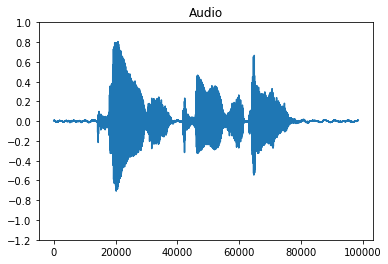

In [22]:
preview_audio_waveform(audio[0])
preview_audio_player(audio[0])

#### Spectrogram building

In [23]:
max_audio_length = max([len(v) for v in audio])
print("Audio max length (prev: 768099): ", max_audio_length)

Audio max length (prev: 768099):  723200


In [24]:
# https://www.tensorflow.org/tutorials/audio/simple_audio#spectrogram

def get_padded_audio(audio, min_length=max_audio_length):
  padding = tf.zeros([min_length] - tf.shape(audio), dtype=tf.float32)
  return tf.concat([audio, padding], 0)

def get_spectrogram(audio):
  audio = get_padded_audio(audio)

  if acceleration == "CPU":
    spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)
  elif acceleration == "GPU":
    with tf.device("/GPU:0"):
      spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)
  elif acceleration == "TPU":
    with tf.device("/TPU:0"):
      spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)

  spectrogram = tf.abs(spectrogram)
  return spectrogram

def audio_downscale_mapper(audio, from_rate=48000, to_rate=16000):
  return tfio.audio.resample(audio, from_rate, to_rate)

def preview_spectrogram(audio, rate=48000):
  audio = get_padded_audio(audio)
  spectrogram = get_spectrogram(audio)

  log_spec = np.log(spectrogram.numpy().T+np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]

  fig, axes = plt.subplots(2, figsize=(12, 8))
  timescale = np.arange(audio.shape[0])
  axes[0].plot(timescale, audio.numpy())
  axes[0].set_title('Waveform')
  axes[0].set_xlim([0, len(timescale)])

  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns). An epsilon is added to avoid log of zero.
  X = np.linspace(0, np.size(spectrogram.numpy()), num=width, dtype=int)
  Y = range(height)
  axes[1].pcolormesh(X, Y, log_spec)
  axes[1].set_title('Spectrogram')
  plt.show()

In [ ]:
# sometimes this crashes colab with a CUDA error :/
# just run everything again if it happens :(
spectrograms = []
for i,v in enumerate(tq.tqdm(audio)):
  if i%100==0:
    time.sleep(0.2) # pray to the tensorflow deities that it doesn't crash
  downscaled = audio_downscale_mapper(v)
  spectro = get_spectrogram(downscaled)
  spectro = tf.expand_dims(spectro, axis=-1)
  spectrograms.append(spectro)

  0%|          | 0/2118 [00:00<?, ?it/s]

In [25]:
print(len(spectrograms), len(speakers))

2118 2118


#### Spectrogram preview



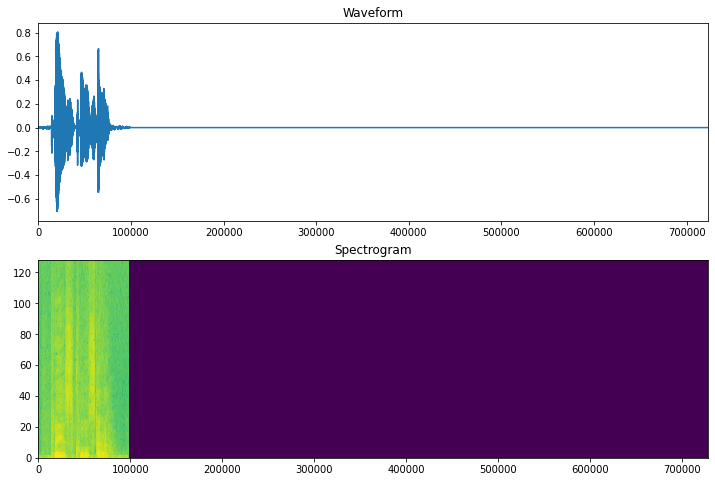

Downsampled


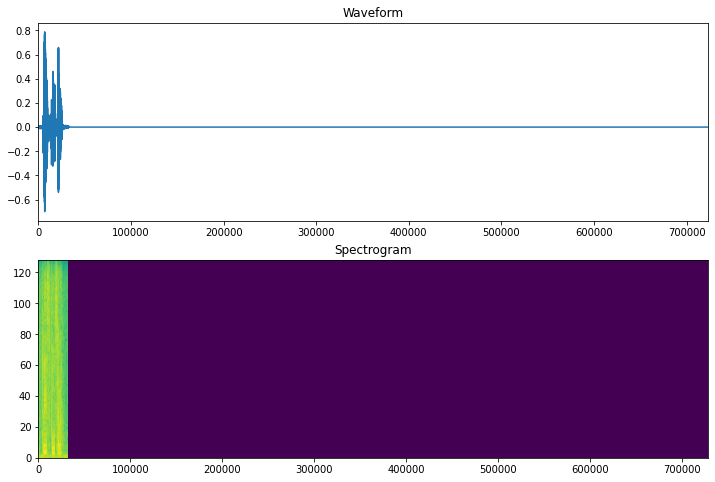

In [26]:
example = audio[0]

preview_spectrogram(example)
preview_audio_player(example)

print("Downsampled")

example = audio_downscale_mapper(example)
preview_spectrogram(example, rate=16000)
preview_audio_player(example, rate=16000)

del example

#### Speaker encoding

In [27]:
speakers_indexed = [ speaker_lookup[v][0] for v in speakers]

In [28]:
num_labels = len(speaker_list)
num_labels

108

In [29]:
speakers_encoded = tf.one_hot(speakers_indexed, depth=num_labels)
speakers_encoded = list(speakers_encoded)

### Dataset splitting

In [30]:
# Seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [31]:
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(
    spectrograms,
    speakers_encoded,
    test_size=0.3
)

# debug for OOM errors
limit = 16
x_train, x_val, y_train, y_val = x_train[:limit], x_val[:limit], y_train[:limit], y_val[:limit]

count=len(spectrograms)
print(f"Total samples: {count}")
print(f"Training sample count: {len(x_train)} ({len(x_train)/count*100:0.2f}%)")
print(f"Validation sample count: {len(x_val)} ({len(x_val)/count*100:0.2f}%)")

Total samples: 2118
Training sample count: 16 (0.76%)
Validation sample count: 16 (0.76%)


### Dataset batching

In [32]:
# batch_size = 16 # 64

# convert from tensors
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
 

print(np.shape(x_train))
print(np.shape(y_train))


# x_train = tf.convert_to_tensor(x_train[:limit]).shape
# y_train = tf.convert_to_tensor(y_train[:limit]).shape

# x_train_ds = tf.data.Dataset.from_tensor_slices(x_train[:limit])
# y_train_ds = tf.data.Dataset.from_tensors(y_train[:limit])

# x_train_ds = x_train_ds.batch(batch_size)#.cache().prefetch(AUTOTUNE)
# y_train_ds = x_train_ds.batch(batch_size)#.cache().prefetch(AUTOTUNE)

(16, 5649, 129, 1)
(16, 108)


### Model building

In [33]:
# _norm_layer = preprocessing.Normalization()
# _norm_layer.adapt(train_ds.map(lambda x, _: x))

In [34]:
input_shape = x_train[0].shape
input_shape

(5649, 129, 1)

In [50]:
input_layer = keras.Input(shape = input_shape, name="input_image")
# resize_layer = layers.Resizing()
conv1_layer = layers.Conv2D(filters=32, kernel_size=3, activation="relu", name="conv2d_1")(input_layer)
max1_layer = layers.MaxPooling2D(pool_size=(2,2), name="max_1")(conv1_layer)
flat_layer = layers.Flatten()(max1_layer)
predict_layer = layers.Dense(num_labels, activation="softmax", name="speaker")(flat_layer)

model = keras.Model(
    inputs = {
        "spectrogram": input_layer
    },
    outputs = {
        "speaker": predict_layer
    }
)

model.summary()

ResourceExhaustedError: ignored

In [45]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    # loss="sparse_categorical_crossentropy",
    loss="categorical_crossentropy",
    # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

### Model training

In [46]:
EPOCHS = 10
print(x_train.shape)
print(y_train.shape)

with tf.device("/CPU:0"):
  history = model.fit(
    x=x_train,
    y=y_train,
    # batch_size = None,
    validation_split=0.2,
    # validation_data=(y_val, x_val),
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
  )

(16, 5649, 129, 1)
(16, 108)
Epoch 1/10


ValueError: ignored

https://stackoverflow.com/questions/67151256/fit-a-keras-model-with-mixed-input-of-type-batchdataset-and-numpy-array


### Debugging 

In [ ]:
shapes = []
for audio, label in train_ds:
  shapes.append(str(audio.shape))
print(set(shapes))

Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


InvalidArgumentError: ignored

In [ ]:
for x in all_ds.take(5):
  print(x)

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
(<tf.Tensor: shape=(5999, 129, 1), dtype=float32, numpy=
array([[[0.17276214],
        [0.10687839],
        [0.01329246],
        ...,
        [0.00171547],
        [0.00197985],
        [0.00084972]],

       [[0.00815219],
        [0.04375362],
        [0.03504972],
        ...,
        [0.0018696 ],
        [0.00164384],
        [0.00044054]],

       [[0.14245236],
        [0.0945631 ],
        [0.02012906],
        ...,
        [0.0013807 ],
        [0.00184175],
        [0.00291496]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[